In [1]:
#Sentiment Analysis on Twitter Comments
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.stem import  WordNetLemmatizer, SnowballStemmer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB,ComplementNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [57]:
# Load the Train dataset
df=pd.read_csv("C:/Users/ADMIN/Favorites/projects/Sentiment Analysis on Twitter_Comments/train.csv")
df.head(10)

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...


In [58]:
#Count the number of values of each Sentiment
df.label.value_counts()

0    5894
1    2026
Name: label, dtype: int64

In [59]:
#Show the rows which has "Negative" Sentiment
df[df.label == 0]

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
6,7,0,Happy for us .. #instapic #instadaily #us #son...
7,8,0,New Type C charger cable #UK http://www.ebay.c...
8,9,0,Bout to go shopping again listening to music #...
9,10,0,Photo: #fun #selfie #pool #water #sony #camera...
13,14,0,I just made another crazy purchase lol my theo...
15,16,0,From #DeepEllum towards #downtown #Dallas. #Bi...


In [60]:
#Show the rows which has "Positive" Sentiment
df[df.label == 1]

,id,label,tweet
4,5,1,What amazing service! Apple won't even talk to...
5,6,1,iPhone software update fucked up my phone big ...
10,11,1,hey #apple when you make a new ipod dont make ...
11,12,1,Ha! Not heavy machinery but it does what I nee...
12,13,1,Contemplating giving in to the iPhone bandwago...
14,15,1,@shaqlockholmes @sam_louise1991 the battery is...
18,19,1,The reason I don't have one. #iphone #suck #ap...
19,20,1,How is the apple store gunna be out of 5C scre...
22,23,1,I've had this new ipod for four days? And this...
23,24,1,when your iPhone screen goes completely black ...


In [6]:

#Null value checking
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [7]:
# Text preprocessing (cleaning the reviews, tokenize and lemmatize the data)
def pre_process(text):
    text=text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    tokens=nltk.word_tokenize(text)  # tokenize
    wnl = WordNetLemmatizer()
    L=[wnl.lemmatize(w) for w in tokens]
    text=" ".join(L)
    return text

In [8]:

#Assign the dataset in input variable 
X = df['tweet'].apply(pre_process)
X.head(10)

0    fingerprint Pregnancy Test httpsgooglh1MfQV an...
1    Finally a transparant silicon case Thanks to m...
2    We love this Would you go talk makememories un...
3    Im wired I know Im George I wa made that way i...
4    What amazing service Apple wont even talk to m...
5    iPhone software update fucked up my phone big ...
6    Happy for u instapic instadaily u sony xperia ...
7    New Type C charger cable UK httpwwwebaycoukitm...
8    Bout to go shopping again listening to music i...
9    Photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

In [9]:
#Assign the dataset in output variable 
y = df['label']
y.head(10)

0    0
1    0
2    0
3    0
4    1
5    1
6    0
7    0
8    0
9    0
Name: label, dtype: int64

In [10]:
# Split the data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5544,) (5544,)
(2376,) (2376,)


In [11]:
# Build the Model 
model1=make_pipeline(CountVectorizer(binary=True,stop_words="english"),BernoulliNB())
model2=make_pipeline(CountVectorizer(binary=False,stop_words="english"),MultinomialNB())
model3=make_pipeline(TfidfVectorizer(stop_words="english"),MultinomialNB())

In [12]:
# Fit the Model to the Train Dataset
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)


Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [17]:
# Predict y of Test Dataset
y_pred_1 = model1.predict(X_test)
y_pred_2 = model2.predict(X_test)
y_pred_3 = model3.predict(X_test)

[0 1 0 ... 0 1 0] [0 1 0 ... 0 1 0] [0 1 0 ... 0 1 0]


Text(0.5, 15.0, 'Predicted class')

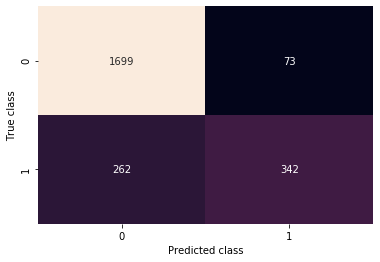

In [18]:

# Confusion matrix of y_test and Model1 prediction result
mat= confusion_matrix(y_test,y_pred_1)
sns.heatmap(mat,annot=True,cbar=False,fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 15.0, 'Predicted class')

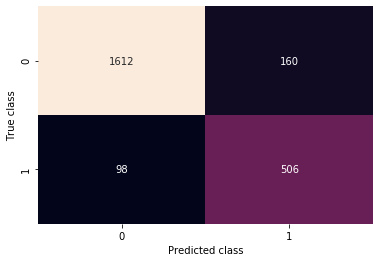

In [19]:

# Confusion matrix of y_test and Model2 prediction result
mat= confusion_matrix(y_test,y_pred_2)
sns.heatmap(mat,annot=True,cbar=False,fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')

Text(0.5, 15.0, 'Predicted class')

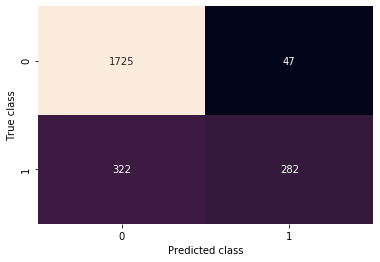

In [20]:

# Confusion matrix of y_test and Model3 prediction result
mat= confusion_matrix(y_test,y_pred_3)
sns.heatmap(mat,annot=True,cbar=False,fmt='d')
plt.ylabel('True class')
plt.xlabel('Predicted class')

In [21]:

# overall accuracy
print("Model1 Score: ", model1.score(X_test,y_test).round(3))
print("Model2 Score: ",model2.score(X_test,y_test).round(3))
print("Model3 Score: ",model3.score(X_test,y_test).round(3))

Model1 Score:  0.859
Model2 Score:  0.891
Model3 Score:  0.845


In [23]:
""" Train with the second model on the entire training data set and use this model to predict unknown test data"""
model4=make_pipeline(CountVectorizer(binary=False,stop_words="english"),MultinomialNB())
model4.fit(X,y)

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words='english', strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [25]:
# load the test data
df1=pd.read_csv("C:/Users/ADMIN/Favorites/projects/Sentiment Analysis on Twitter_Comments/test.csv")
df1.head(10)

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...
5,7926,#Repost @getbakednfried with repostapp ・・・ to ...
6,7927,This new apple software update is really doing...
7,7928,BABY #iPhone #iphone6s #gold #new #apple #appl...
8,7929,I'm confused...why did I have to take the time...
9,7930,Fruit just tastes better when you pick it your...


In [26]:
#Cleansing the test dataset
Xtest=df1.tweet.apply(pre_process)
Xtest.head()

0    I hate the new iphone upgrade Wont let me down...
1    currently shitting my fucking pant apple iMac ...
2    Id like to put some CDROMS on my iPad is that ...
3    My ipod is officially dead I lost all my pictu...
4    Been fighting iTunes all night I only want the...
Name: tweet, dtype: object

In [27]:

#Now make Prediction on Test dataset
predicted_sentiment=model4.predict(Xtest)
predicted_sentiment

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [43]:
sentiment = []
for i in predicted_sentiment:
    if i == 1:
        sentiment.append("Positive")
    else:
        sentiment.append("Negative")

sentiment

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',
 'Positive',
 'Negative',
 'Positive',
 'Negative',
 'Negative',

In [53]:
#Now We create a DataFrame where we store the result as Sentiment analysis output
df2 = pd.DataFrame({'Sentiment':sentiment[:], 'Label':predicted_sentiment[:] })
df2.head(10)


,Sentiment,Label
0,Positive,1
1,Positive,1
2,Positive,1
3,Positive,1
4,Positive,1
5,Negative,0
6,Positive,1
7,Negative,0
8,Positive,1
9,Negative,0


In [54]:
#Take the "id" column from test dataset and put our prediction result according to it. 
final_result = df2.join(df1['id']).iloc[:,::-1]
final_result.head(10)

,id,Label,Sentiment
0,7921,1,Positive
1,7922,1,Positive
2,7923,1,Positive
3,7924,1,Positive
4,7925,1,Positive
5,7926,0,Negative
6,7927,1,Positive
7,7928,0,Negative
8,7929,1,Positive
9,7930,0,Negative


In [55]:
#Write the output to the csv file.
final_result.to_csv("C:/Users/ADMIN/Favorites/projects/Sentiment Analysis on Twitter_Comments/final_submission.csv", index=False)
